# Capstone Project Flask UI

Pada capstone ini anda diminta untuk membangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot dari skeleton yang sudah disediakan dan satu plot tambahan berdasarkan analisis anda.

File ini dapat dimanfaatkan untuk membantu anda dalam proses wrangling dan visualization. Apabila proses wrangling sudah tepat dan hasil visualisasi sudah sesuai dengan ketentuan, anda dapat memindahkan kembali kode program yang sudah anda lengkapi ke dalam file `app.py`.

## Create Virtual Enviroment 

a. Created virtual environment called "capstone-flask"

Hal pertama yang harus dilakukan adalah melakukan pengaturan environment conda. Untuk menyiapkan conda environment dan kernel, silahkan gunakan command berikut:

```
conda create -n <ENV_NAME> python=3.10
conda activate <ENV_NAME>

conda install ipykernel
python -m ipykernel install --user --name <ENV_NAME>
```

b. Install packages: pandas, flask, matplotlib, dan numpy

Seluruh dependecies telah di-export ke dalam file requirements.txt. Oleh karena itu untuk melakukan install packages, Anda dapat menggunakan perintah berikut:

```
pip install -r requirements.txt --user
```

## Data Preprocessing

**Import library**

In [1]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore

In [77]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10+000+,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500+000+,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5+000+000+,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50+000+000+,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100+000+,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5+000+,Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1+000+,Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1+000+,Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [17]:
playstore = pd.read_csv("data/googleplaystore.csv"),
                        parse_dates = ["Last Updated"])
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**Data Cleansing** 

**_Task 1:_** Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)

In [361]:
playstore["App"].duplicated().sum()

1181

In [360]:
playstore.drop_duplicates(subset = ["App"], keep= False)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13310822,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar

In [ ]:
playstore.drop([10472], inplace=True)

**_Task 2:_** Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai


In [240]:
playstore.dtypes

App                     category
Category                category
Rating                   float64
Reviews                    int64
Size                       int64
Installs                  object
Type                    category
Price                    float64
Content Rating          category
Genres                  category
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [118]:
playstore["Genres"] = playstore["Genres"].astype("category")
playstore["Content Rating"] = playstore["Content Rating"].astype("category")
playstore["Type"] = playstore["Type"].astype("category")
playstore["Category"] = playstore["Category"].astype("category")
playstore["App"] = playstore["App"].astype("category")

playstore["Reviews"] = playstore["Reviews"].astype("int64")

playstore["Last Updated"] = playstore["Last Updated"].astype("datetime64[ns]")



**_Task 3:_** Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer

In [83]:
playstore["Installs"] = playstore["Installs"].apply(lambda x: x.replace(",",""))
playstore["Installs"] = playstore["Installs"].apply(lambda x: x.replace("+", ""))

Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini

In [86]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)


**_Task 4:_** Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

In [89]:
playstore["Price"] = playstore["Price"].apply(lambda x: x.replace("$",""))
playstore["Price"] = playstore["Price"].astype("float64")

Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer

In [91]:
##code here
playstore["Size"] = playstore["Size"].astype("int64")


## Data Wrangling

In [93]:
df2 = playstore.copy()

**_Task 5:_** Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan `Jumlah`
sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category.

In [421]:
top_category = pd.crosstab(
    index = df2["Category"],
    columns = "top_category").sort_values(by = "top_category",ascending = False)


In [103]:
top_category.head()

col_0,top_category
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460


**_Task 6:_** Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`

In [412]:
total = df2['Category'].value_counts().sort_values(ascending=False)
most_categories = total.index[0]
total

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [406]:
playstore.groupby('Category')['App'].count().reset_index().sort_values('App', ascending=False).rename(columns={'App':'Total'})


,Category,Total
11,FAMILY,1972
14,GAME,1144
29,TOOLS,843
20,MEDICAL,463
4,BUSINESS,460
25,PRODUCTIVITY,424
23,PERSONALIZATION,392
6,COMMUNICATION,387
28,SPORTS,384
18,LIFESTYLE,382


In [407]:
most_categories = playstore.groupby('Category')['App'].count().reset_index().sort_values('App', ascending=False).rename(columns={'App':'Total'})

total = 1927

`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Silahkan melakukan agregasi data yang tepat menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
Pindahkan kode wrangling yang disimpan dalam variable `rev_table` pada `blank code` yang telah di chaining dengan kode `.to_html`.

In [414]:
rev_table = playstore.groupby('App').agg({'Reviews':'sum'}).sort_values('Reviews', ascending=False).head(10)
rev_table

,Reviews
App,
Instagram,266241989
WhatsApp Messenger,207348304
Clash of Clans,179558781
Messenger – Text and Video Chat for Free,169932272
Subway Surfers,166331958
Candy Crush Saga,156993136
Facebook,156286514
8 Ball Pool,99386198
Clash Royale,92530298


In [141]:
rev_table.dtypes

App           object
Category    category
Rating       float64
Reviews        int64
Size           int64
dtype: object

In [364]:
rev_table = df2.iloc[:, :4]

<Axes: >

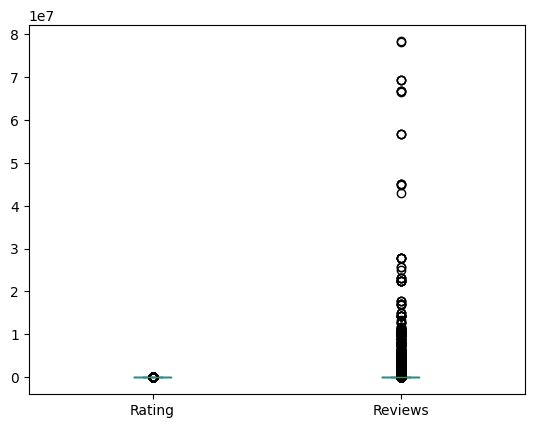

In [365]:
rev_table.plot(kind = "box")

In [366]:
rev_table

,App,Category,Rating,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967
...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4
10838,Parkinson Exercices FR,MEDICAL,NaN,3
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114


Apabila menuliskan kode program yang tepat maka hasil wrangling adalah sebagai berikut :

In [16]:
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


## Data Visualization

**Membuat Bar Plot**

**_Task 7:_** 
Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak

In [289]:
test = df2.groupby(['Genres'])['Installs'].count().reset_index

test()

,Genres,Installs
0,Action,365
1,Action;Action & Adventure,17
2,Adventure,75
3,Adventure;Action & Adventure,13
4,Adventure;Brain Games,1
...,...,...
114,Video Players & Editors,173
115,Video Players & Editors;Creativity,2
116,Video Players & Editors;Music & Video,3
117,Weather,82


In [219]:
df2["Genres"].nunique()

119

In [169]:
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [207]:
df2["Category"].nunique()

33

In [244]:
rev_table_melt = playstore.reset_index().melt(id_vars = "Genres")
rev_table_melt.head(5)

,Genres,variable,value
0,Art & Design,index,0
1,Art & Design;Pretend Play,index,1
2,Art & Design,index,2
3,Art & Design,index,3
4,Art & Design;Creativity,index,4


In [266]:
df2["Content Rating"].duplicated().sum()

10834

In [261]:
df2['Type'].notna().sum()

10839

In [263]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  category      
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  int64         
 5   Installs        10840 non-null  object        
 6   Type            10839 non-null  category      
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  category      
 9   Genres          10840 non-null  category      
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 895.9+ KB


In [ ]:
dfa = df2.groupby(['Category'])['Reviews'].sum().reset_index()

In [246]:
dfa = df2.groupby(['Category'])['Reviews'].sum().reset_index()

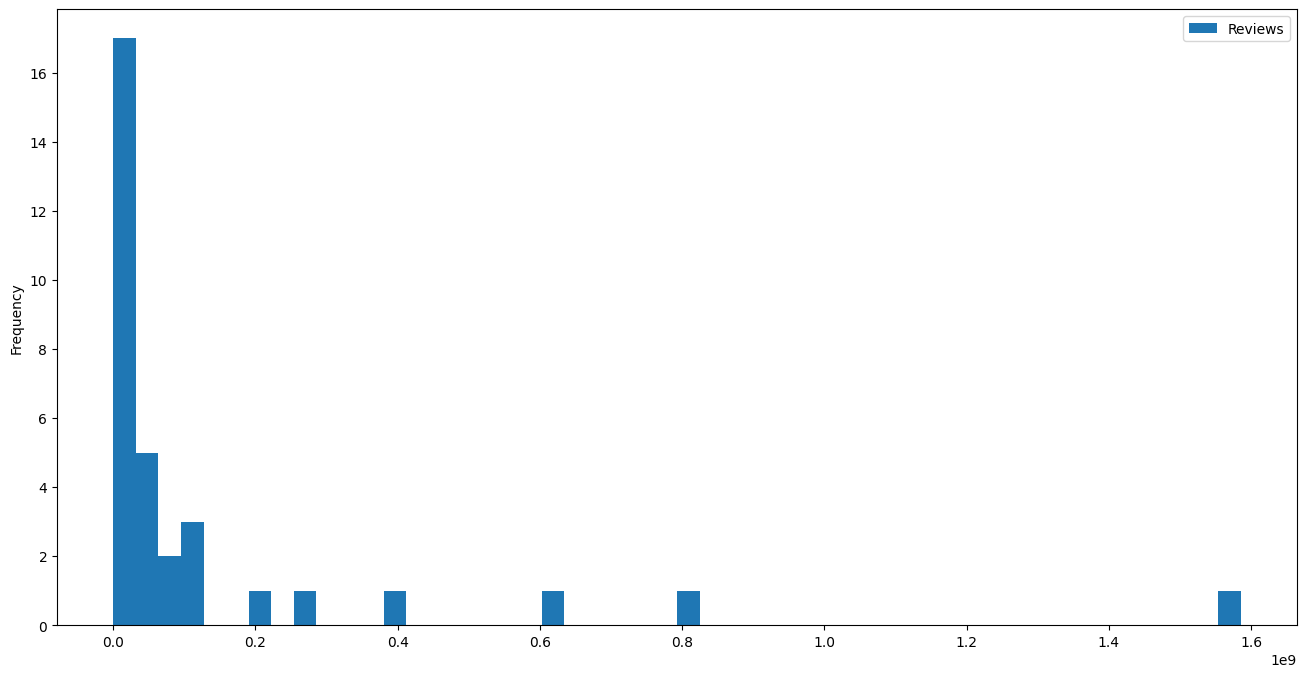

In [392]:
dfa.plot.hist(bins=50, figsize=(16,8));

TypeError: 'Axes' object is not subscriptable

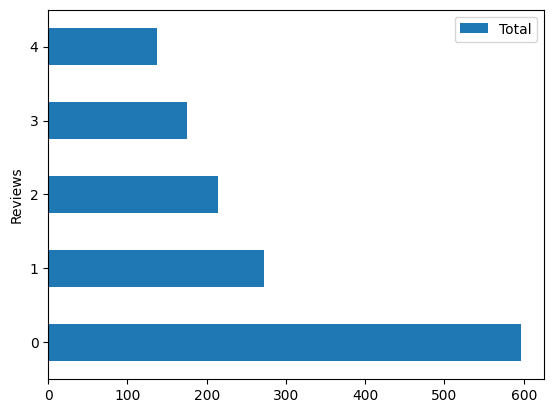

<Figure size 2400x900 with 0 Axes>

In [462]:

    cat_order = df2.groupby("Reviews").agg({
    "Category" : "count"
     }).rename({'Category':'Total'}, axis=1).sort_values(by = "Reviews").head().plot(kind= "barh")
    X = "Total"
    Y = "Category"
    my_colors = ['r','g','b','k','y','m','c']

    # bagian ini digunakan untuk membuat kanvas/figure

    fig = plt.figure(figsize=(8,3),dpi=300)
    fig.add_subplot
    # bagian ini digunakan untuk membuat bar plot
    plt.barh(cat_order[Y], cat_order[X], color=my_colors)
    plt.ticklabel_format(style="plain",axis="x")
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
    plt.savefig('cat_order.png',bbox_inches="tight")

In [ ]:
test = df2

<ipython-input-18-2e3b6f171ed0>:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)


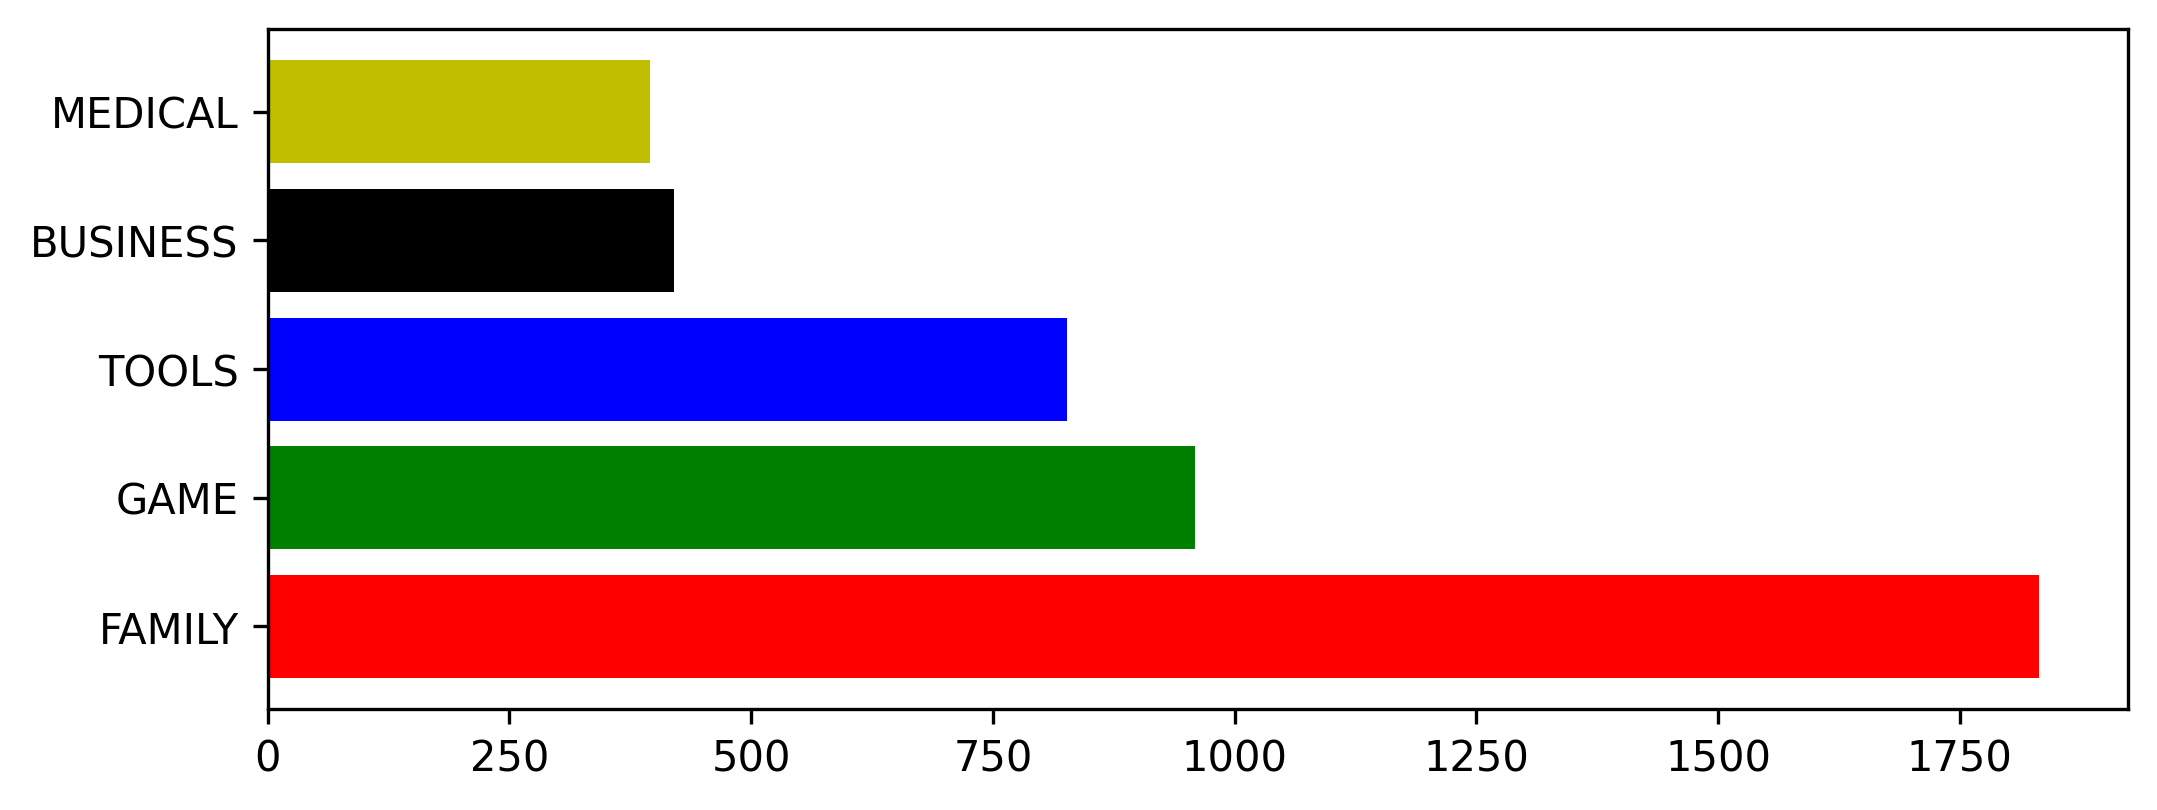

In [18]:
cat_order = df2.groupby("Reviews").agg({
_________ : _________
 }).rename({'Category':'Total'}, axis=1).sort_values(__________).head()
X = "Category"
Y = "Total"
my_colors = ['r','g','b','k','y','m','c']
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(____,_____, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

**Membuat Scatter Plot**

**_Task 8:_** Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    

In [193]:
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [211]:
df2["Content Rating"].nunique()

6

In [346]:
df2.dtypes

App                       object
Category                category
Rating                   float64
Reviews                    int64
Size                       int64
Installs                   int32
Type                    category
Price                    float64
Content Rating          category
Genres                  category
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

NameError: name 'int64' is not defined

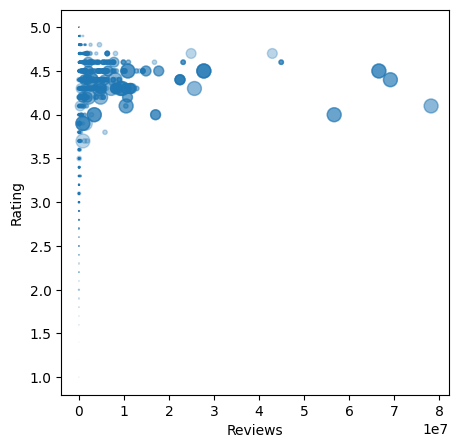

In [351]:
X = df2["Reviews"].values # axis x
Y = df2["Rating"].values # axis y
area = df2["Installs"].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

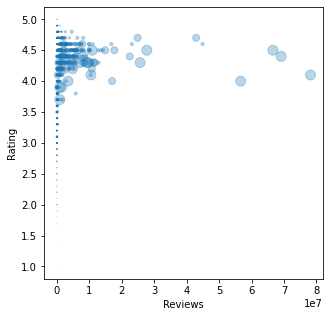

In [19]:
X = df2[______].values # axis x
Y = df2[______].values # axis y
area = playstore[_______].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt._______(x=_____,y=______, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

**Membuat Histogram Size Distribution**

**_Task 9:_** Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang terbentuk terbagi menjadi 100 bins

df2[["Android Ver"]].head(30).plot(kind="barh")

In [296]:
playstore.dtypes

App                     category
Category                category
Rating                   float64
Reviews                    int64
Size                       int64
Installs                  object
Type                    category
Price                    float64
Content Rating          category
Genres                  category
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [335]:
X

array([19.      , 14.      ,  8.7     , ...,  9.5     , 13.310822,
       19.      ])

AttributeError: 'NoneType' object has no attribute 'show'

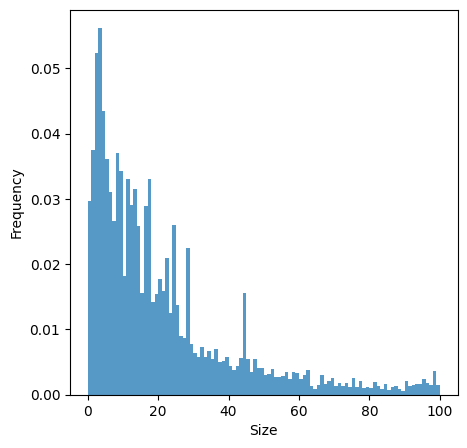

In [339]:
X= (playstore["Size"]/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X, bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight").show()

Text(0, 0.5, 'Frequency')

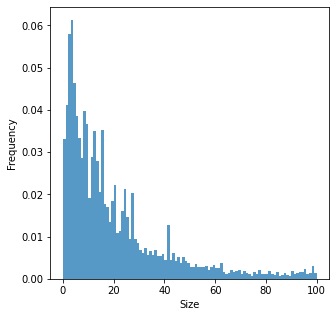

In [20]:
X=(___________/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt._______(_____,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

**_Task 10:_** Buatlah plot berdasarkan hasil analisis anda. Plot yang dibuat tidak diperbolehkan sama dengan plot yang sudah dicontohkan.

In [194]:
## code here


df2.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up


In [398]:
df2["Last Updated"].duplicated().sum()

9463

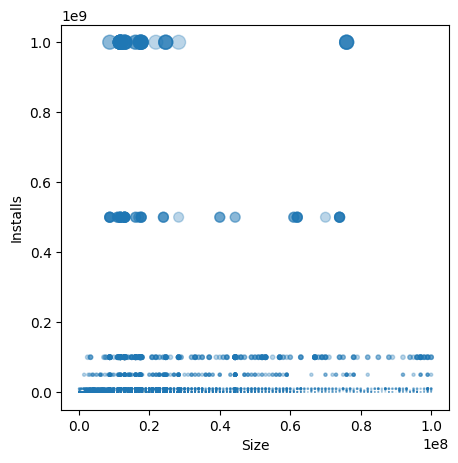

In [403]:
X = df2["Size"].values # axis x
Y = df2["Installs"].values # axis y
area = df2["Installs"].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(X, Y, s=area, alpha=0.3)
plt.xlabel('Size')
plt.ylabel('Installs')
plt.savefig('rev_rat.png',bbox_inches="tight")


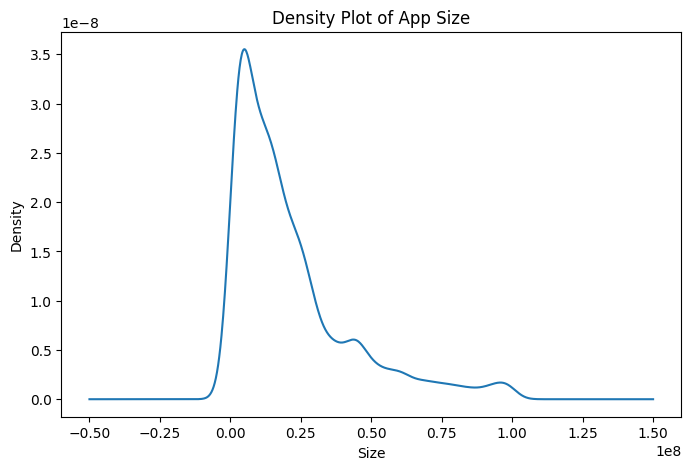

In [420]:
import matplotlib.pyplot as plt

X = df2["Size"].values # axis x
Y = df2["Installs"].values # axis y


fig, ax = plt.subplots(figsize=(8,5))
ax.set_title("Density Plot of App Size")
ax.set_xlabel("Size")
ax.set_ylabel("Density")

df2["Size"].plot(kind="density", ax=ax)
plt.show()


In [425]:
top_category = pd.crosstab(
    index = df2["Category"],
    columns = "top_category").sort_values(by = "top_category",ascending = False)


In [424]:
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [428]:
print(playstore.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


TypeError: unhashable type: 'dict'

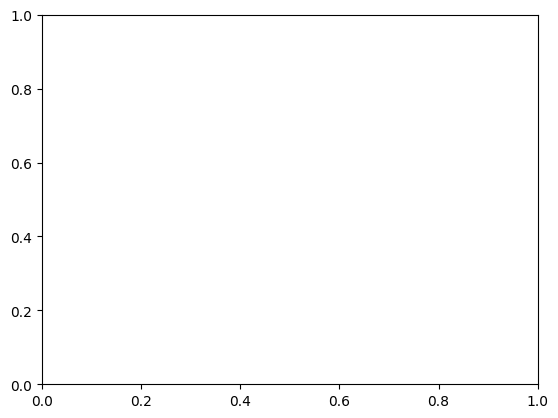

In [453]:
cat_order = playstore.groupby("Category").agg({
    "Category" : "count"
},axis=1).rename({'Category':'Total'}, axis=1).sort_values("Category").head()

X = "Total"
Y = "Category"
my_colors = ['r','g','b','k','y','m','c']

# bagian ini digunakan untuk membuat bar plot
plt.barh({"Category":"Total"} ,cat_order[X], color=my_colors)
plt.ticklabel_format(style="plain",axis="x")

# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png', bbox_inches="tight") 


In [454]:
 ## Bar Plot
    cat_order = playstore.groupby("Category").agg({
    "Category" : "count"
        }).rename({'Category':'Total'}, axis=1).sort_values("Category").head()
    X = "Total"
    Y = "Category"
    my_colors = ['r','g','b','k','y','m','c']
    # bagian ini digunakan untuk membuat kanvas/figure
    
   
    # bagian ini digunakan untuk membuat bar plot
    plt.barh(cat_order[Y], cat_order[X], color=my_colors)
    plt.ticklabel_format(style="plain",axis="x")
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
    plt.savefig('cat_order.png',bbox_inches="tight") 


IndentationError: unexpected indent (1793850156.py, line 2)